# Download the dataset from kaggle

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ngavus","key":"a5554e71cd13f25edbd22997038c4109"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

In [ ]:
!kaggle datasets download -d michaelcripman/road-sign-recognition

100% 3.28G/3.28G [00:56<00:00, 79.9MB/s]



In [ ]:
!unzip /content/drive/MyDrive/AIIJC/AIJ_2GIS_en.zip

Archive:  /content/drive/MyDrive/AIIJC/AIJ_2GIS_en.zip
   creating: AIJ_2GIS_en/
  inflating: AIJ_2GIS_en/AIJ_2gis.zip  
  inflating: AIJ_2GIS_en/description_en.txt  
  inflating: __MACOSX/AIJ_2GIS_en/._description_en.txt  
  inflating: AIJ_2GIS_en/5_15_2_vocab_en.json  
  inflating: __MACOSX/AIJ_2GIS_en/._5_15_2_vocab_en.json  


In [ ]:
!unzip /content/AIJ_2GIS_en/AIJ_2gis.zip

# Padding image

In [ ]:
!pip install opencv-python

In [ ]:
import cv2
img = cv2.imread('/content/AIJ_2gisPUBLISH/AIJ_2gis/train_images/00005963-b492-48b0-bde5-ae7a696b0419.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

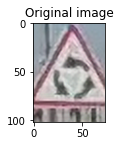

In [ ]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

plt.subplot(236),plt.imshow(img),plt.title('Original image')
plt.show()

In [ ]:
# Add padding to images
import math
height, width, channels = img.shape
BLUE = [225,225,225]
print(height, width)
print(int((128-height)/2), int((128-width)/2))
padded_img = cv2.copyMakeBorder(img,math.floor((128-height)/2),math.ceil((128-height)/2),math.floor((128-width)/2),math.ceil((128-width)/2),cv2.BORDER_CONSTANT,value=BLUE)

65 42
31 43


In [ ]:
# Hàm thêm padding để lên tới 64x64
# Input: đường link tới hình ảnh
# Output: padded_img: một hình ảnh đã được thêm padding
import os
from tensorflow.keras.preprocessing.image import save_img
import math
import cv2
import numpy as np
BLUE = [225,225,225]
directory = '/content/AIJ_2gis/'
save_dir = '/content/drive/MyDrive/AIIJC/padded_images/'
def padding(url, label):
  dir = directory + url
  
  img = img[0:128, 0:128]
  height, width, channels = img.shape
  padded_img = cv2.copyMakeBorder(img,math.floor((128-height)/2), math.ceil((128-height)/2),
                                  math.floor((128-width)/2), math.ceil((128-width)/2), 
                                  cv2.BORDER_CONSTANT, value = BLUE)
  url = url.replace('test_private_images/', '')
  url = url.replace('test_public_images/', '')
  save_at = save_dir + label + '/' + url
  if os.path.exists(save_at):
    print('Existed: ' + save_at)
  else:
    save_img(save_at, padded_img)
    print(save_at)

# ISR model
[Image Super-Resolution (ISR)](https://github.com/idealo/image-super-resolution)

In [ ]:
# chạy cái này
!pip install ISR

In [ ]:
# chạy cái này
!pip install 'h5py==2.10.0' --force-reinstall

In [ ]:
# chạy cái này
# Uncomment if using local repo
# import sys
# sys.path.append('..')
from ISR.models import RDN, RRDN

# model = RDN(weights = 'noise-cancel')
# model = RRDN(weights = 'gans')
model = RDN(weights = 'psnr-small')
# model = RDN(weights = 'psnr-large')

10698752/10694096 [==============================] - 1s 0us/step


In [ ]:
import pandas as pd
train_csv = pd.read_csv('/content/drive/MyDrive/AIIJC/add_finalv2.csv')
train_csv.columns = ['filename', 'label'] 
urls = train_csv['filename'].tolist()
labels = train_csv['label'].tolist()


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def process(filename: str = None) -> None:
    """
    View multiple images stored in files, stacking vertically

    Arguments:
        filename: str - path to filename containing image
    """
    image = mpimg.imread(filename)
    # <something gets done here>
    plt.figure()
    plt.imshow(image)

def increase_res(url):
  img = cv2.imread(url)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = model.predict(img)
  return img

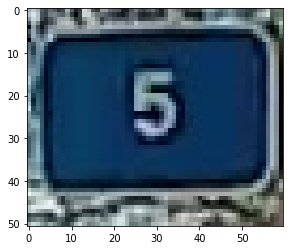

In [ ]:
process(directory + train_images[0])

# ERSGAN MODEL

In [ ]:
# TensorFlow
import tensorflow as tf
import tensorflow_hub as hub

# Requests
import cv2
import requests
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
import PIL 

In [ ]:
ESRGAN_MODEL_PATH = "https://tfhub.dev/captain-pool/esrgan-tf2/1"

In [ ]:
model = hub.load(ESRGAN_MODEL_PATH)

In [ ]:
def download_image(url, source = 'Yes'):
    """
    Download image from URL
    """
    img = cv2.imread(url)
    image_array = np.asarray(img, dtype = np.uint8)
    image = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)
    return image

In [ ]:
def plot_image(image):
    plt.figure(figsize = (10, 10))
    plt.title(image.shape)
    plt.imshow(image)
    plt.show()

In [ ]:
def preprocess_image(image):
    """
    Pre process image for model
    """
    image_size = (tf.convert_to_tensor(test_image.shape[:-1]) // 4) * 4
    cropped_image = tf.image.crop_to_bounding_box(image, 0, 0, image_size[0], image_size[1])
    new_image = tf.cast(cropped_image, tf.float32)
    
    return tf.expand_dims(new_image, 0)

In [ ]:
def run(image):
    """
    Run super resolution model
    """
    preprocessed_image = preprocess_image(image)
    print('Shape:', preprocessed_image.shape)
    new_image = model(preprocessed_image)
    return tf.squeeze(new_image) / 255.0

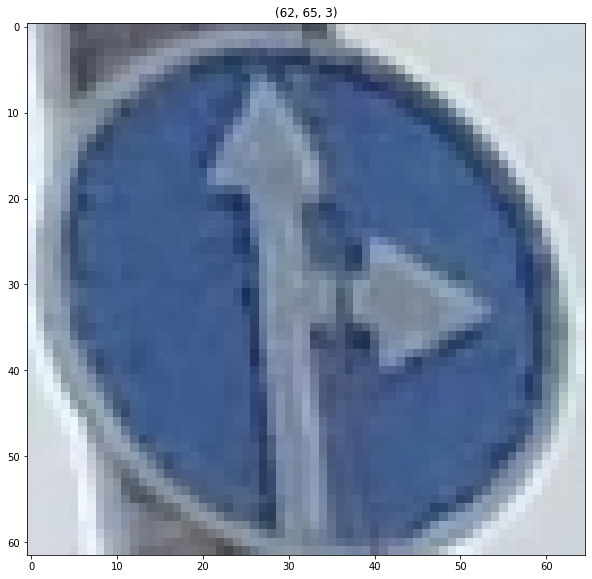

In [ ]:
url = '/content/AIJ_2gisPUBLISH/AIJ_2gis/train_images/760f0d58-e351-4dca-bfe8-f8d86f18058c.png'
test_image = download_image(url)
plot_image(test_image)


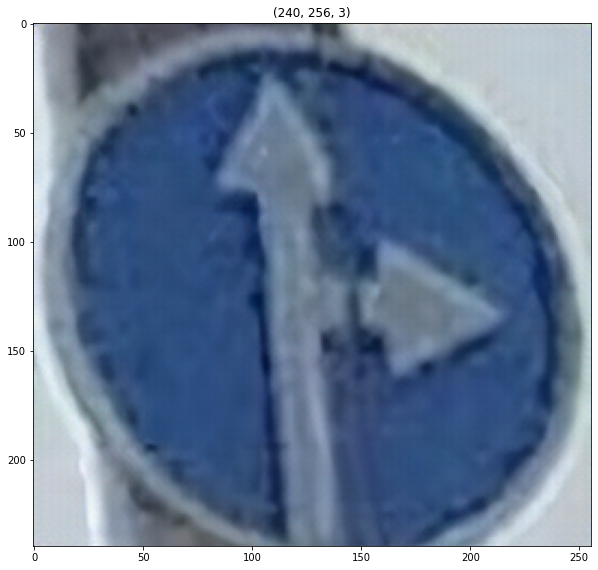

In [ ]:
url = '/content/sample.png'
test_image = download_image(url)
plot_image(test_image)
fake_image = run(test_image)
save_img('sample2.png', fake_image)

(240, 256, 3)


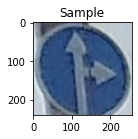

In [ ]:
url = '/content/sample.png'
sample = cv2.imread(url)
sample = cv2.cvtColor(sample, cv2.COLOR_BGR2RGB)
print(sample.shape)
plt.subplot(236), plt.imshow(sample), plt.title('Sample')
plt.show()

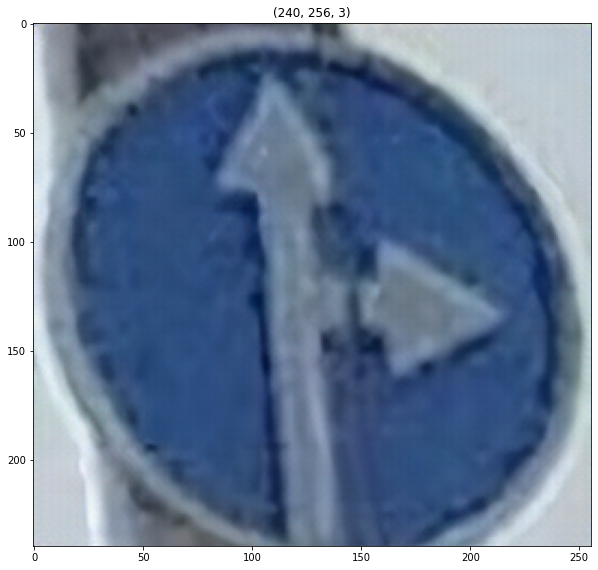

In [ ]:
url = '/content/sample.png'
test_image = download_image(url)
plot_image(test_image)

In [ ]:
url = '/content/AIJ_2gisPUBLISH/AIJ_2gis/train_images/760f0d58-e351-4dca-bfe8-f8d86f18058c.png'
sample = cv2.imread(url)
sample = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
scale_percent = 25 # percent of original size
width = int(sample.shape[1] * scale_percent / 100)
height = int(sample.shape[0] * scale_percent / 100)
dim = (width, height)

## Scraping Images

In [ ]:
!pip install -q jmd_imagescraper

In [ ]:
!pip install -U selenium

In [ ]:
!pip install bs4

In [ ]:
!pip install requests

In [ ]:
!pip install beautifulsoup4 selenium

     |████████████████████████████████| 911kB 29.4MB/s 


In [ ]:
import os
import time

import io
import hashlib
import signal
from glob import glob
import requests

from PIL import Image
from selenium import webdriver

import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import os
import json
import urllib2
import sys
import time

In [ ]:
number_of_images = 100
GET_IMAGE_TIMEOUT = 2
SLEEP_BETWEEN_INTERACTIONS = 0.1
SLEEP_BEFORE_MORE = 5
IMAGE_QUALITY = 85

output_path = "/content/drive/MyDrive/AIIJC/New images"

In [ ]:
search_terms = ['3она с ограничением максимальной скорости']

In [ ]:
from pathlib import Path
root = Path().cwd()/"/content/drive/MyDrive/AIIJC/New images"

In [ ]:
print(root)

/content/drive/MyDrive/AIIJC/New images


In [ ]:
from jmd_imagescraper.core import * # dont't worry, it's designed to work with import *

duckduckgo_search(root, "5_31+5", "3она с ограничением максимальной скорости", max_results = 20)

In [ ]:

import requests 
from bs4 import BeautifulSoup 
    
def getdata(url): 
    r = requests.get(url) 
    return r.text 
    
htmldata = getdata("https://www.google.com/search?q=3%D0%BE%D0%BD%D0%B0+%D1%81+%D0%BE%D0%B3%D1%80%D0%B0%D0%BD%D0%B8%D1%87%D0%B5%D0%BD%D0%B8%D0%B5%D0%BC+%D0%BC%D0%B0%D0%BA%D1%81%D0%B8%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B9+%D1%81%D0%BA%D0%BE%D1%80%D0%BE%D1%81%D1%82%D0%B8&tbm=isch&ved=2ahUKEwjquO2AwLLxAhUKXJQKHcKxAHYQ2-cCegQIABAA&oq=3%D0%BE%D0%BD%D0%B0+%D1%81+%D0%BE%D0%B3%D1%80%D0%B0%D0%BD%D0%B8%D1%87%D0%B5%D0%BD%D0%B8%D0%B5%D0%BC+%D0%BC%D0%B0%D0%BA%D1%81%D0%B8%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B9+%D1%81%D0%BA%D0%BE%D1%80%D0%BE%D1%81%D1%82%D0%B8&gs_lcp=CgNpbWcQA1C9QVjXRGCyR2gAcAB4AIABmAGIAZsCkgEDMC4ymAEAoAEBqgELZ3dzLXdpei1pbWfAAQE&sclient=img&ei=u6XVYKrvCoq40QTC44KwBw&bih=657&biw=1366&rlz=1C1CHBF_enVN863VN863") 
soup = BeautifulSoup(htmldata, 'html.parser') 
for item in soup.find_all('img'):
    print(item['src'])

## Second method to scrape image

In [ ]:
! git clone https://github.com/InputBlackBoxOutput/Google-Image-Scraper

Cloning into 'Google-Image-Scraper'...
remote: Enumerating objects: 156, done.
remote: Counting objects: 100% (156/156), done.
remote: Compressing objects: 100% (147/147), done.
remote: Total 156 (delta 26), reused 89 (delta 6), pack-reused 0
Receiving objects: 100% (156/156), 7.72 MiB | 28.32 MiB/s, done.
Resolving deltas: 100% (26/26), done.


In [ ]:
!pip install -r /content/Google-Image-Scraper/requirements.txt

In [ ]:
# Edit path to where you want to save the images
!path="/content/drive/MyDrive/AIIJC/New images/5_9"
!cd $path

In [ ]:
import requests

import urllib3
http = urllib3.PoolManager()

import warnings
warnings.filterwarnings('ignore', message='Unverified HTTPS request')

from io import BytesIO
import PIL.Image as Image

from html.parser import HTMLParser
from html.entities import name2codepoint

import os, sys
from tqdm import tqdm
import string

#------------------------------------------------------------------------------------------------
class SrcExtractor(HTMLParser):
  src = []
  def handle_starttag(self, tag, attrs):
    if tag == "img":
      for each in attrs:
        if each[0] == "data-src":
          # print(each[1])
          self.src.append(each[1])
         
srcExtractor = SrcExtractor()

#------------------------------------------------------------------------------------------------
headers = {
    'User-Agent': "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.90 Safari/537.36"
    } 

#------------------------------------------------------------------------------------------------
def getImages(search, limit = 10, outDir = None, addon = ""):
	try:
		print("\033[96m" + f"Keyword:{search}" + "\033[00m\n") 

		try:
			print("Creating directory...", end = "")
			if outDir == None:
				os.mkdir(search)
			else:
				os.mkdir(f"{outDir}/{search}")
			print("Done")
		except FileExistsError:
			print("\nDirectory already exits")

		url = f"https://www.google.com/search?q={addon}{search}&source=lnms&tbm=isch&sa=X&ved=2ahUKEwjozNPH4J3rAhVUU30KHXRzDSoQ_AUoAXoECBEQAw&biw=1366&bih=625"       
		response = requests.request("GET", url, headers = headers)
		srcExtractor.feed(response.text)
		len_src = len(srcExtractor.src)

		count = 0
		for each_src in tqdm(srcExtractor.src[:limit], bar_format='{l_bar}{bar:20}{r_bar}{bar:-10b}'):
			response = http.request('GET', each_src)
			img_data = BytesIO(response.data)
			image = Image.open(img_data).convert("RGBA")

			if outDir == None:
				image.save(f"{search}/{count+1}.png")
			else:
				image.save(f"{outDir}/{search}/{count+1}.png")
			count += 1

		print(f"Downloaded {count}/{limit} images")

		srcExtractor.src = [] 
		print("\033[97m" + 70 * '-' + "\033[00m") 

	except:
		print("\033[31m"+ "Something went wrong!\nPlease check passed options" + "\033[00m")
		sys.exit

#------------------------------------------------------------------------------------------------

# Image Aumentation


In [ ]:
!pip install imgaug

In [ ]:
!!pip install -U git+https://github.com/albu/albumentations --no-cache-dir

Original:


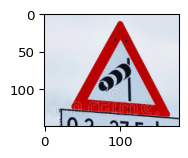

In [ ]:
import imageio
import imgaug as ia
%matplotlib inline

image = imageio.imread("/content/drive/MyDrive/AIIJC/New images/1_29/Ảnh chụp màn hình 2021-06-23 001411.png")

print("Original:")
ia.imshow(image)

In [ ]:
import random
import os
import cv2
from matplotlib import pyplot as plt
import albumentations as A
def visualize(image):
    plt.figure(figsize = (30, 30))
    plt.axis('off')
    plt.imshow(image)

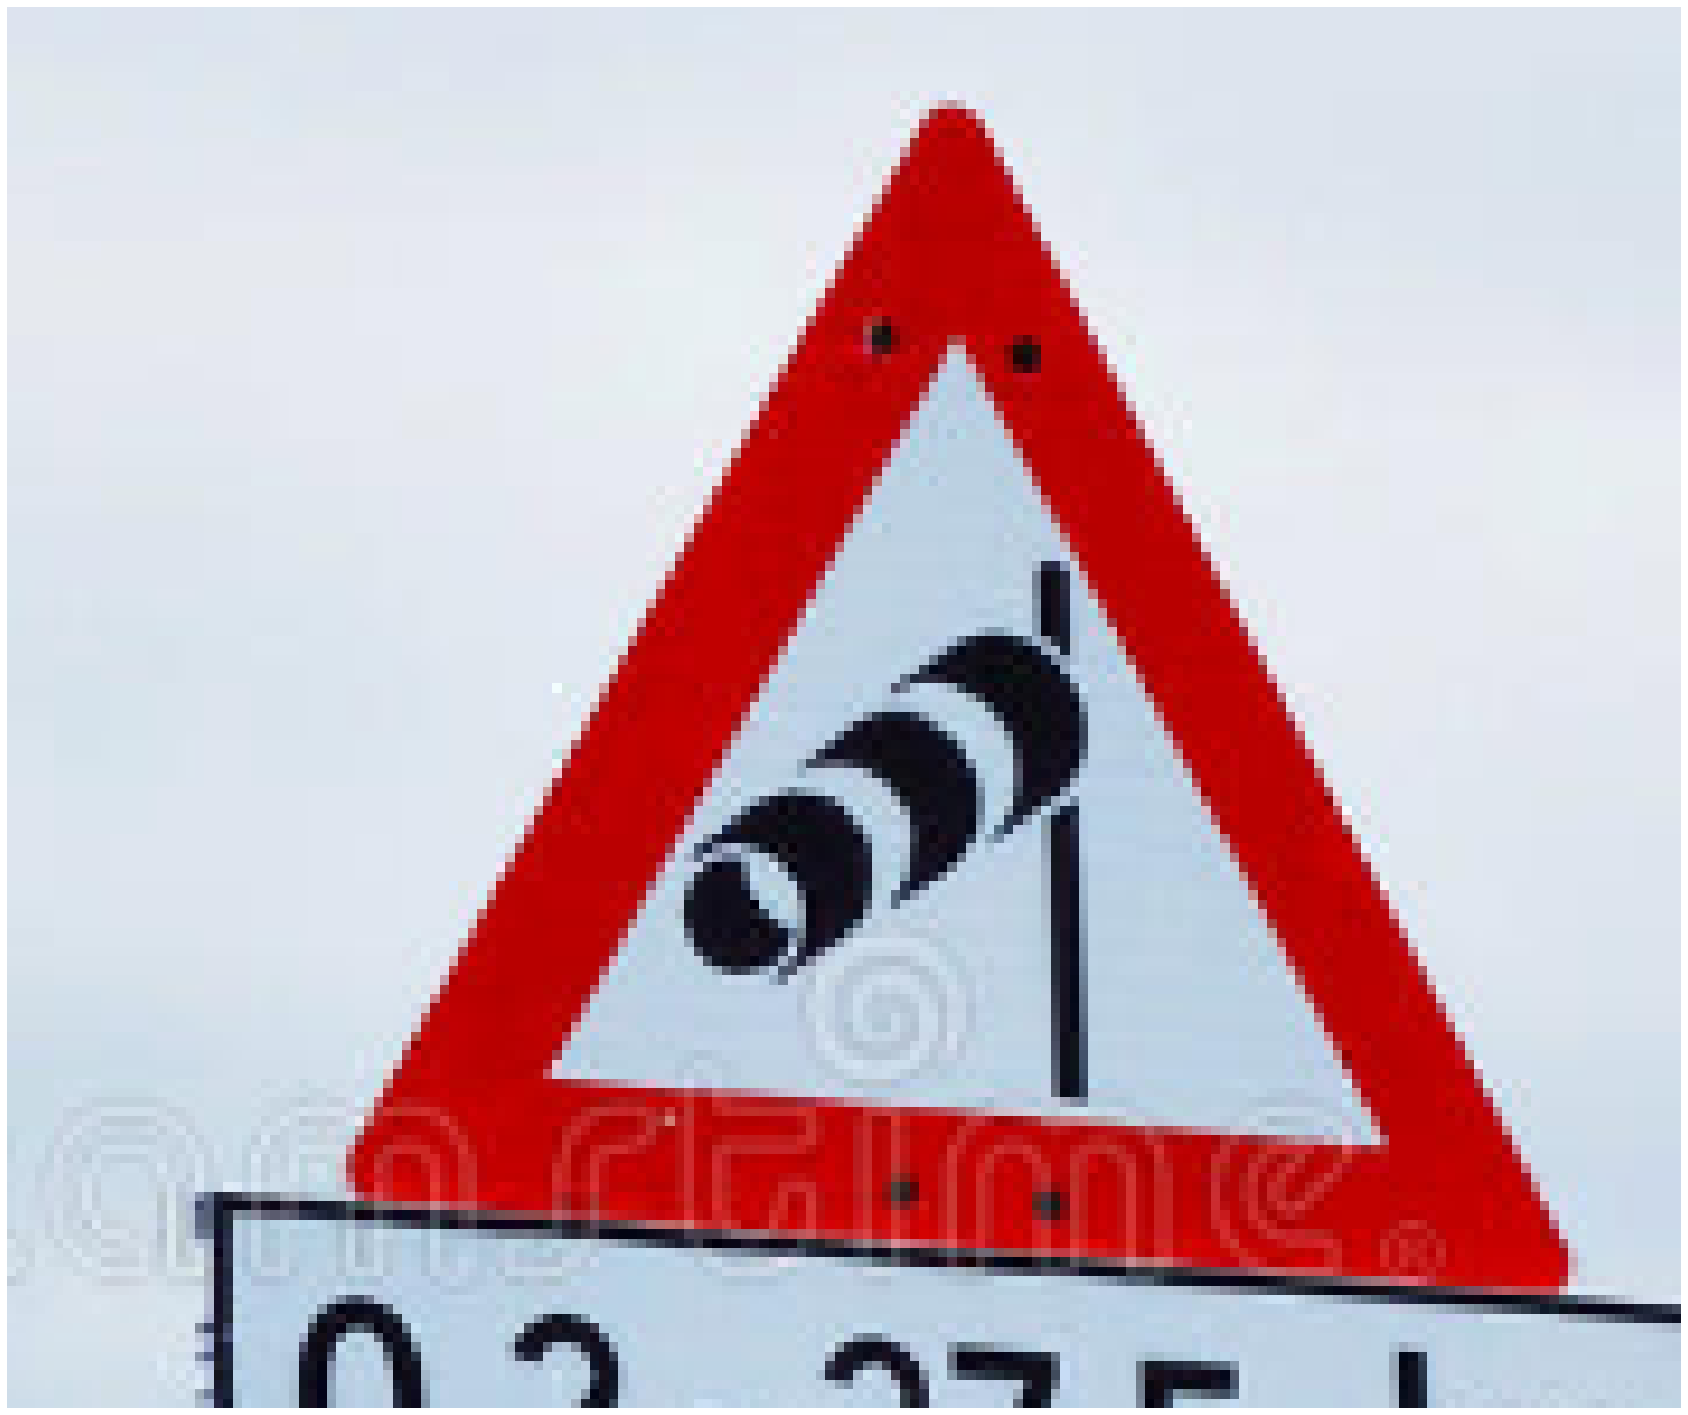

In [ ]:
image = cv2.imread('/content/drive/MyDrive/AIIJC/New images/1_29/Ảnh chụp màn hình 2021-06-23 001411.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
visualize(image)

In [ ]:
transform = A.Compose([
    A.HorizontalFlip(p = 0.5),
    A.RandomBrightnessContrast(p = 0.2),
    A.RandomSnow(snow_point_lower = 0.1, snow_point_upper = 0.3, brightness_coeff = 2.5, always_apply = False, p = 0.5)
])

In [ ]:
rain = A.Compose(
    [A.RandomRain(always_apply = False, p = 1.0, slant_lower = -10, slant_upper = 10, drop_length = 20, 
    drop_width = 1, drop_color = (0, 0, 0), blur_value = 2, brightness_coefficient = 0.699999988079071, rain_type = None)],
)

snow = A.Compose(
    [A.RandomSnow(always_apply = False, p = 1.0, snow_point_lower = 0.1, snow_point_upper = 0.2, brightness_coeff = 2.5)],
)

shadow = A.Compose(
    [A.RandomShadow(num_shadows_lower = 1, num_shadows_upper = 1, shadow_dimension = 5, shadow_roi = (0, 0.5, 1, 1), p = 1)],
)

fog = A.Compose(
    [A.RandomFog(always_apply = False, p = 1.0, fog_coef_lower = 0.10000000149011612, fog_coef_upper = 0.4599999785423279, 
    alpha_coef = 0.41999998688697815)],
)

In [ ]:
augments = [rain, snow, shadow, fog]

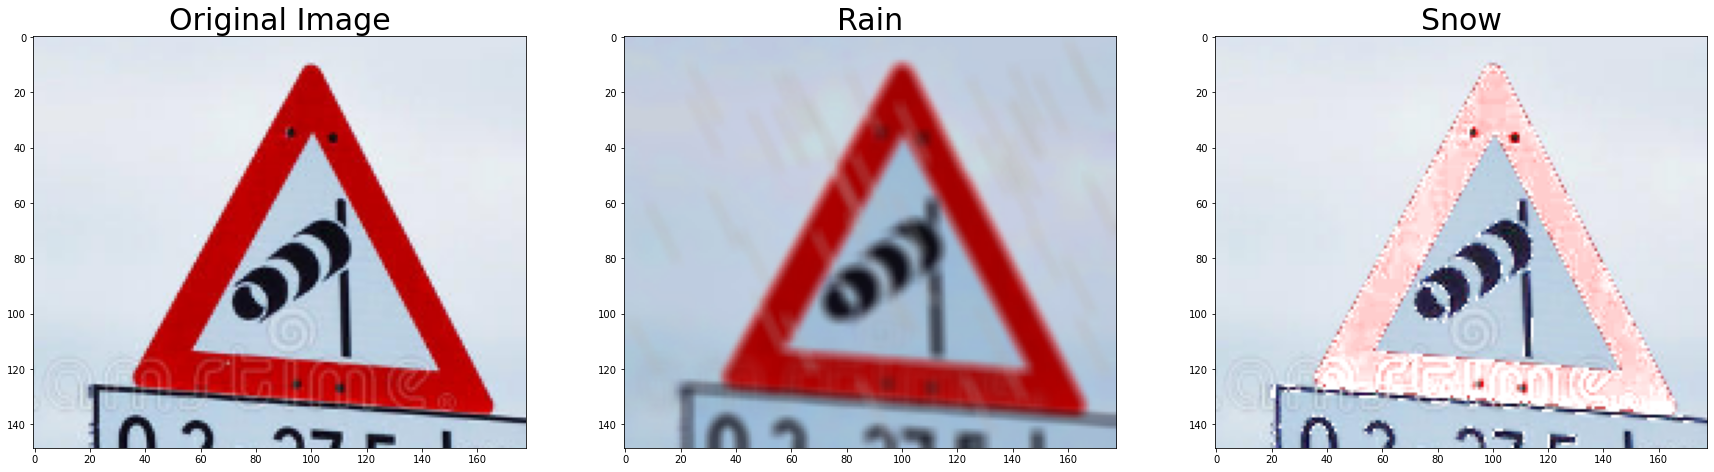

In [ ]:
# image=image2
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (30, 16))
ax[0].imshow(image)
ax[0].set_title("Original Image", size = 30)
ax[1].imshow(rain(image = image)['image'])
ax[1].set_title("Rain", size = 30)
ax[2].imshow(snow(image = image)['image'])
ax[2].set_title("Snow", size = 30);

In [ ]:
labels = os.listdir('/content/drive/MyDrive/AIIJC/New images')

In [ ]:
def augment2(label, image,x):
  # image_list = os.listdir(directory+label)
  # print(image_list)
  # for name in image_list:
  #   url = directory+label +'/'+name
    image = cv2.imread(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    k = 0
    for x in range(0,len(augments)):
      for i in range(15):
        k +=1
        result = augments[x](image=image)['image']
        filename =str(k) +str(i)+'.png'
        save_img(directory+label +'/'+filename, result)
        print(k)

# Auto Encoder

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
import pandas as pd
import math

from tensorflow.keras import Model, Input, regularizers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import save_img
from PIL import Image

import glob
from tqdm import tqdm
import warnings;
warnings.filterwarnings('ignore')

In [ ]:
csv_file = pd.read_csv('/content/drive/MyDrive/AIIJC/ensemble_2.csv')
train_csv = pd.read_csv('/content/drive/MyDrive/AIIJC/train.csv')

In [ ]:
csv_file1 = csv_file[11966:17948]
csv_file2 = csv_file[18169:18262]

In [ ]:
frames = [train_csv, csv_file1, csv_file2]
result = pd.concat(frames)

In [ ]:
result.to_csv('final_dataset.csv')

In [ ]:
sign_images = csv_file['filename'].tolist()

In [ ]:
image_name = []

In [ ]:
for i in range(len(sign_images)):
  if (sign_images[i].find('test_public_images/') != -1):
    image_name.append(sign_images[i])

In [ ]:
root_dir = '/content/drive/MyDrive/AIIJC/sample_submission/'

In [ ]:
img = image.load_img(root_dir + sign_images[1], target_size = (80, 80, 3))
img = image.img_to_array(img)
img = img/255.0

In [ ]:
img[None].shape

(1, 80, 80, 3)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
autoencoder = keras.models.load_model("/content/drive/MyDrive/AIIJC/autoencoder.h5") # load pre_trained auto encoder model

In [ ]:
result = autoencoder.predict(img[None])

In [ ]:
type(result[0])

numpy.ndarray

In [ ]:
plt.rcParams["axes.grid"] = False
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.title("Encoded")
plt.imshow(resized)

plt.show()

In [ ]:
root_dir = '/content/AIJ_2gis/'
save_dir = '/content/drive/MyDrive/AIIJC/sample_submission/'

def auto_encoder(url):
  img = image.load_img(url, target_size=(80, 80, 3))
  img = image.img_to_array(img)
  img = img/255.0
  return autoencoder.predict(img[None])  

for x in image_name:
  result = auto_encoder(root_dir + x)
  save_at = save_dir + x
  print(save_at)
  save_img(save_at, result[0])